# RNN for regression on a given data set
For this task we will mostly be using stuff that has already been coded here: https://github.com/mouradmourafiq/tensorflow-lstm-regression, especially for formatting the data and building the model. The code in lstm.py provides very useful, since it defines a quite simple model already. It also adds the possibility to use dense layers, even though testing showed, we dont need them for this task. Also note, that the given lstm.py has been modified by removing the validation set from all of it, since test and train sets are sufficient. However since the model is saved in an external directory, it seems to completely change the model again, one must first delete the lstm folder in ops_logs

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error
from lstm import  lstm_model, load_csvdata

In [16]:
LOG_DIR = './ops_logs/lstm'
TIMESTEPS = 20
RNN_LAYERS = [{'num_units': 10}]
DENSE_LAYERS = None
TRAINING_STEPS = 20000
BATCH_SIZE = 100
n_examples= 1000

# Load The Data from CSV 

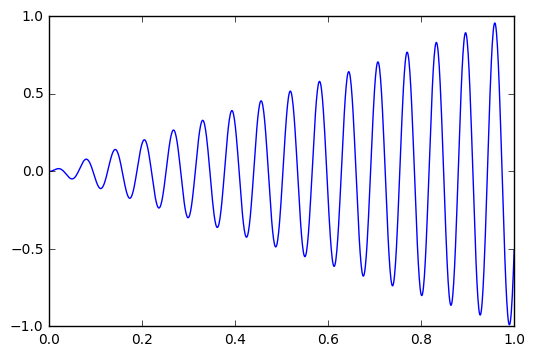

In [19]:
#Loading the data using panda, before splitting it into x and y
data = pd.read_csv("csv/project02_task2.csv")
datax=data['x']
datay=data['y']
plt.plot(datax,datay)
#this will format the data in a way that the LSTM will be able to use it,
#it will also split into training and test data with ratio 9 to 1
X, y = load_csvdata(datay, TIMESTEPS, seperate=False)

In [4]:
#define the regression model using tensorflow and lstm_model() found in lstm.py
regressor = learn.Estimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS),
                           model_dir=LOG_DIR)

In [5]:
#fit/train the model, this is where most time is consumed
regressor.fit(X['train'], y['train'],
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

Instructions for updating:
Use mean_squared_error.


Estimator(params=None)

In [6]:
#now we predict on training and test data
predicted = regressor.predict(X['test'])
trained = regressor.predict(X['train'])

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Use mean_squared_error.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Use mean_squared_error.


In [22]:
#x_axis for plots, divided into training and testing
x_axis_predicted=datax[n_examples-X['test'].shape[0]:n_examples]
x_axis_trained=datax[TIMESTEPS:X['train'].shape[0]+TIMESTEPS]
#correct y values divided into training and testing for plots
real_y_predicted=datay[n_examples-X['test'].shape[0]:n_examples]
real_y_trained=datay[TIMESTEPS:X['train'].shape[0]+TIMESTEPS]

In [20]:
#some mean squared errors
score = mean_squared_error(predicted, y['test'])
print ("MSE on test set: %f" % score)
score = mean_squared_error(trained, y['train'])
print ("MSE on training set: %f" % score)


MSE on test set: 0.000026
MSE on training set: 0.000003


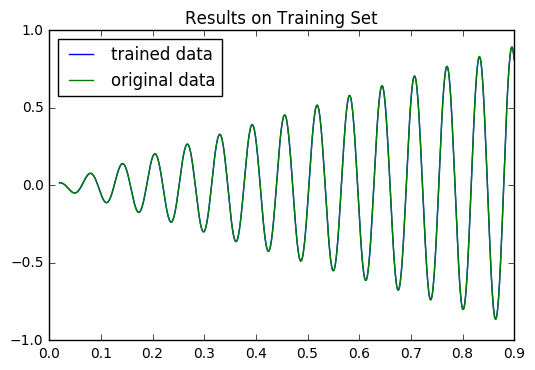

In [23]:
# plot for the training set

fig, ax = plt.subplots(1)

plot_trained, = ax.plot(x_axis_trained,trained, label='trained data')

plot, = ax.plot(x_axis_trained, real_y_trained, label='original data')

plt.title('Results on Training Set')

plt.legend(handles=[ plot_trained, plot],loc=2)
plt.show()

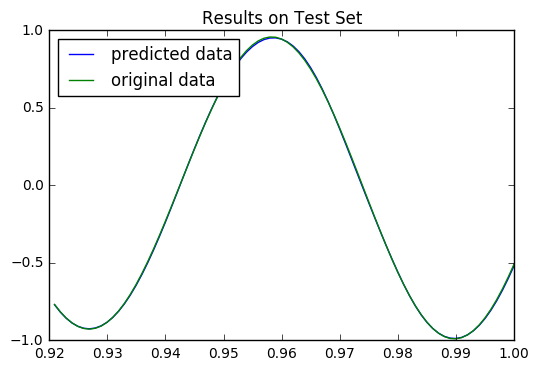

In [24]:
# plot for the test set

fig, ax = plt.subplots(1)

plot_predicted, = ax.plot(x_axis_predicted,predicted, label='predicted data')

plot, = ax.plot(x_axis_predicted,real_y_predicted, label='original data')

plt.title('Results on Test Set')

plt.legend(handles=[plot_predicted, plot],loc=2)
plt.show()

# Second Dataset
This dataset contains CO2 values from the Mauna Loa, a volcano on Hawai. We will proceed in the same steps as in the above dataset

In [22]:
LOG_DIR2 = './ops_logs/lstm2'
TIMESTEPS = 10
RNN_LAYERS = [{'num_units': 10}]
DENSE_LAYERS = [10, 10]
TRAINING_STEPS = 10000
BATCH_SIZE = 100
n_examples= 468

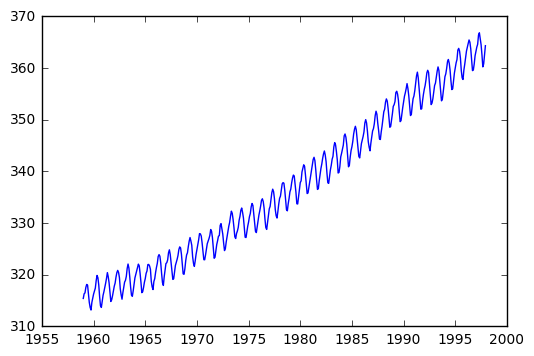

In [29]:
data2 = pd.read_csv("csv/mauna_loa_co2.csv")
time=data2['time']
co2=data2['co2']
plt.plot(time,co2)
X2, y2 = load_csvdata(co2, TIMESTEPS, seperate=False)

In [15]:
#define the regression model using tensorflow and lstm_model() found in lstm.py
regressor2 = learn.Estimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS),
                           model_dir=LOG_DIR2)

In [16]:
#fit/train the model, this is where most time is consumed
regressor2.fit(X2['train'], y2['train'],
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

Instructions for updating:
Use mean_squared_error.


Estimator(params=None)

In [17]:
#now we predict on training and test data
predicted = regressor2.predict(X2['test'])
trained = regressor2.predict(X2['train'])

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Use mean_squared_error.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Use mean_squared_error.


In [18]:
#x_axis for plots, divided into training and testing
x_axis_predicted=time[n_examples-X2['test'].shape[0]:n_examples]
x_axis_trained=time[TIMESTEPS:X2['train'].shape[0]+TIMESTEPS]
#correct y values divided into training and testing for plots
real_y_predicted=co2[n_examples-X2['test'].shape[0]:n_examples]
real_y_trained=co2[TIMESTEPS:X2['train'].shape[0]+TIMESTEPS]

In [19]:
#some mean squared errors
score = mean_squared_error(predicted, y2['test'])
print ("MSE on test set: %f" % score)
score = mean_squared_error(trained, y2['train'])
print ("MSE on training set: %f" % score)


MSE on test set: 698.071411
MSE on training set: 170.101410


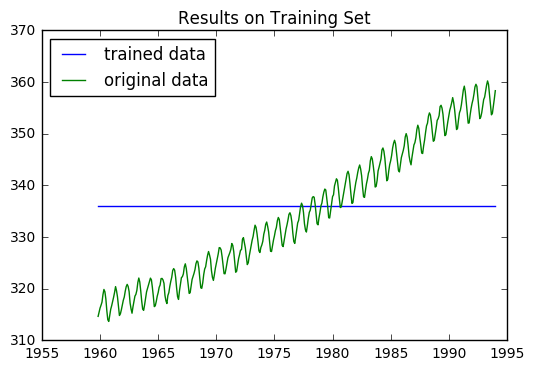

In [20]:
# plot for the training set

fig, ax = plt.subplots(1)

plot_trained, = ax.plot(x_axis_trained,trained, label='trained data')

plot, = ax.plot(x_axis_trained, real_y_trained, label='original data')

plt.title('Results on Training Set')

plt.legend(handles=[ plot_trained, plot],loc=2)
plt.show()

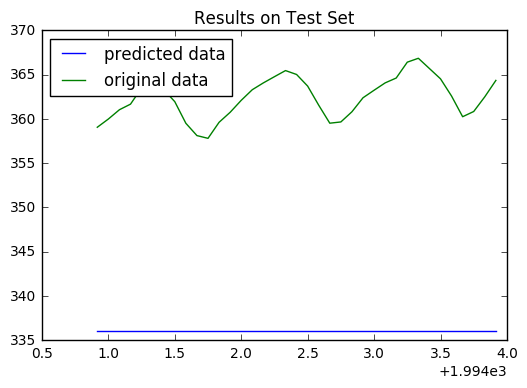

In [21]:
# plot for the test set

fig, ax = plt.subplots(1)

plot_predicted, = ax.plot(x_axis_predicted,predicted, label='predicted data')

plot, = ax.plot(x_axis_predicted,real_y_predicted, label='original data')

plt.title('Results on Test Set')

plt.legend(handles=[plot_predicted, plot],loc=2)
plt.show()